In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import image as tfi

In [42]:
IMAGE_SIZE = 300

# classnames
class_names = ['battery', 'cable', 'crt_tv', 'e_kettle', 'fridge', 'keyboard', 'laptop', 'light_bulb', 'monitor', 'mouse', 'pcb', 'phone', 'printer', 'rice_cooker', 'washing_machine']


In [3]:
def load_image(image_path: str) -> tf.Tensor:
    
    '''
    The task of the function is to load the image present in the specified given image path. Loading the image the function also performed some 
    preprocessing steps such as resizing and normalization.
    
    Argument:
        image_path(str) : This is a string which represents the location of the image file to be loaded.
        
    Returns:
        image(tf.Tensor) : This is the image which is loaded from the given image part in the form of a tensor.
    '''
    
    # Check if image path exists
    assert os.path.exists(image_path), f'Invalid image path: {image_path}'
    
    # Read the image file
    image = tf.io.read_file(image_path)
    
    # Load the image
    try:
        image = tfi.decode_jpeg(image, channels=3)
    except:
        image = tfi.decode_png(image, channels=3)
    
    # Change the image data type
    image = tfi.convert_image_dtype(image, tf.float32)
    
    # Resize the Image
    image = tfi.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    
    # Convert image data type to tf.float32
    image = tf.cast(image, tf.float32)
    
    return image

In [4]:
model = keras.models.load_model('model2.h5')
model.summary()

Model: "e-waste_xception_v1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 15)                30735     
                                                                 
Total params: 20,892,215
Trainable params: 30,735
Non-trainable params: 20,861,480
_________________________________________________________________


In [5]:
input_shape = model.layers[0].input_shape
input_shape

(None, 300, 300, 3)

In [43]:
# Load an image from file
img_path = './input/e_waste_classification/batre_a2_tidur_dan_berdiri.jpg'
tf_img = load_image(img_path)
img = np.reshape(tf_img, (300,300,3))

# Add a new axis along the first dimension
tensor = img[tf.newaxis, ...]

tensor.shape

(1, 300, 300, 3)

In [34]:
predictions = model.predict(tensor)
predictions

1/1 [==============================] - 0s 460ms/step


array([[0.1383267 , 0.43331498, 0.00320299, 0.01783011, 0.00602486,
        0.00131659, 0.04021914, 0.31037068, 0.00702204, 0.00839637,
        0.01016745, 0.00470315, 0.00350835, 0.00741653, 0.00818002]],
      dtype=float32)

In [64]:
temp = predictions.flatten()
temp2 = np.argsort(temp)
top3 = temp2[::-1][:3]

for index in top3:
  print(index, class_names[index], temp[index]*100)

1 cable 43.33149790763855
7 light_bulb 31.037068367004395
0 battery 13.832670450210571


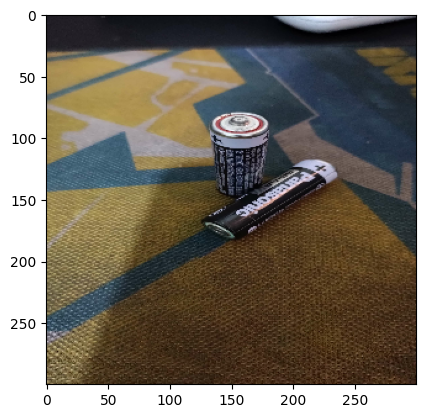

cable 43.33%


In [49]:
predicted_index = np.argmax(predictions)

predicted_class_name = class_names[predicted_index]
predicted_probability = np.max(predictions) * 100

plt.imshow(img)
plt.show()

print(f"{predicted_class_name} {predicted_probability:.2f}%")

In [31]:
def preprocess_img(img_path):
    # Load an image from file
    tf_img = load_image(img_path)
    img = np.reshape(tf_img, (300,300,3))

    # Add a new axis along the first dimension
    tensor = img[tf.newaxis, ...]
    
    return tensor

def do_predict(image_path, preprocessed_image):
    predictions = model.predict(preprocessed_image)

    class_names = ['battery', 'cable', 'crt_tv', 'e_kettle', 'fridge', 'keyboard', 'laptop', 'light_bulb', 'monitor', 'mouse', 'pcb', 'phone', 'printer', 'rice_cooker', 'washing_machine']

    predicted_index = np.argmax(predictions)

    predicted_class_name = class_names[predicted_index]
    predicted_probability = np.max(predictions) * 100

    img = load_image(image_path)
    plt.imshow(img)
    plt.show()

    print(f"{predicted_class_name} {predicted_probability:.2f}%")

1/1 [==============================] - 1s 1000ms/step


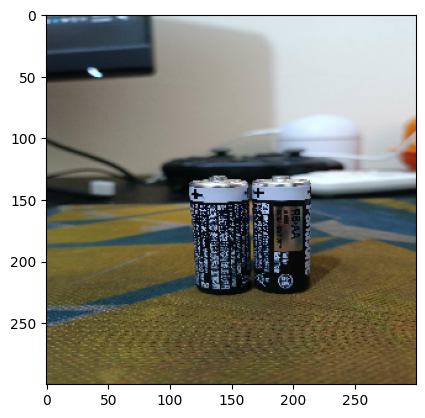

battery 41.00%
1/1 [==============================] - 0s 404ms/step


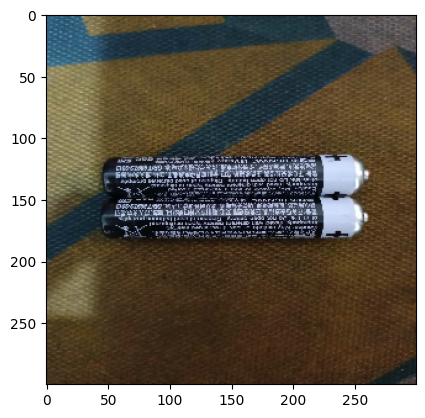

battery 33.49%
1/1 [==============================] - 0s 303ms/step


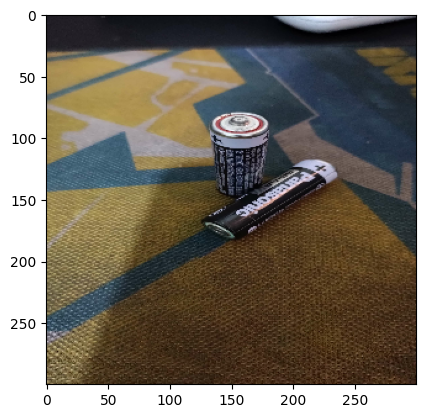

cable 43.33%
1/1 [==============================] - 0s 280ms/step


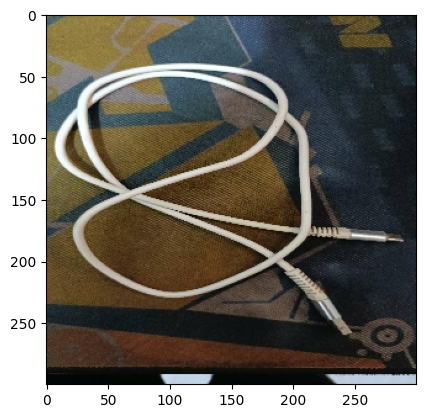

cable 99.30%
1/1 [==============================] - 0s 396ms/step


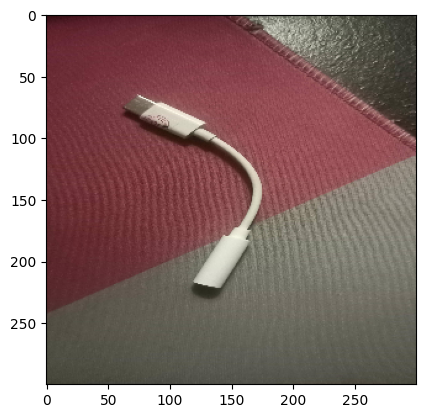

cable 56.18%
1/1 [==============================] - 0s 263ms/step


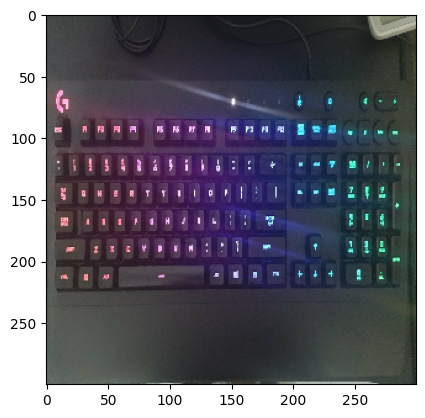

keyboard 99.89%
1/1 [==============================] - 0s 254ms/step


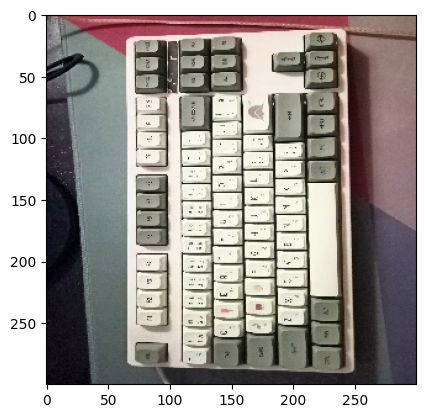

keyboard 99.89%
1/1 [==============================] - 0s 304ms/step


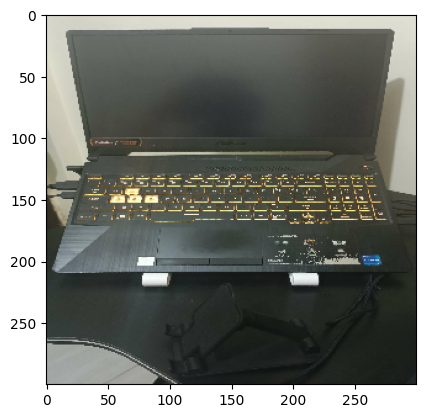

laptop 68.07%
1/1 [==============================] - 0s 319ms/step


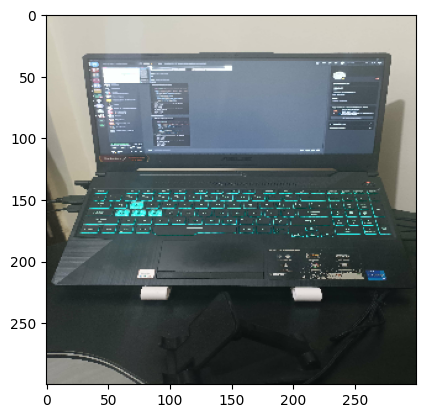

laptop 95.89%
1/1 [==============================] - 0s 336ms/step


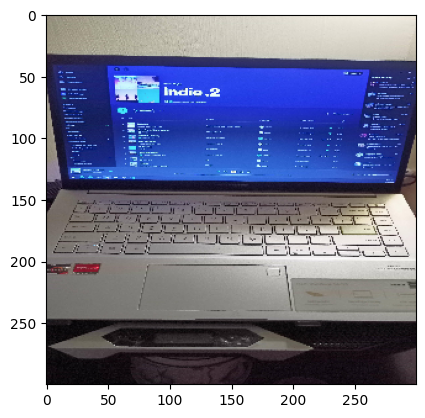

laptop 91.10%
1/1 [==============================] - 0s 317ms/step


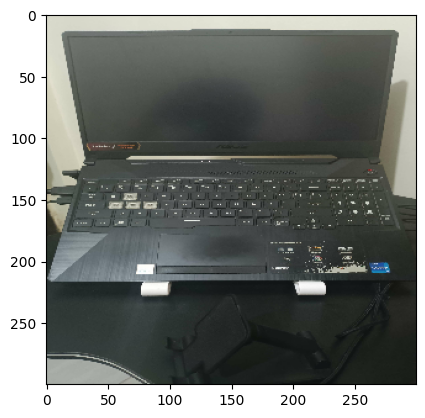

laptop 97.82%
1/1 [==============================] - 0s 282ms/step


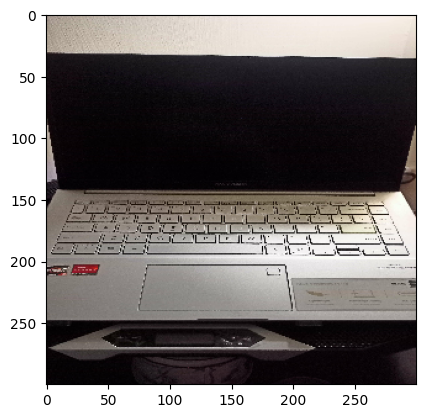

laptop 92.30%
1/1 [==============================] - 0s 325ms/step


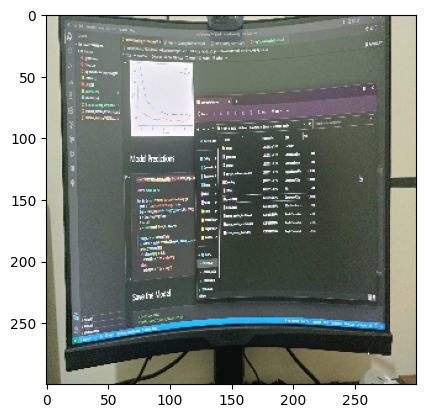

monitor 77.74%
1/1 [==============================] - 0s 256ms/step


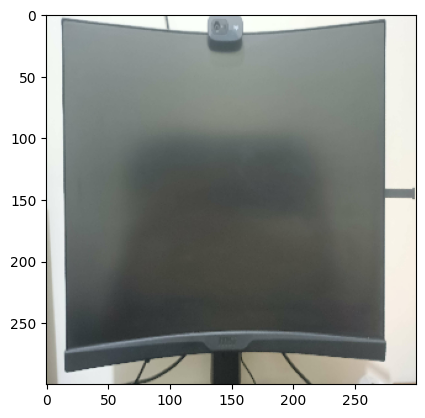

monitor 97.46%
1/1 [==============================] - 0s 282ms/step


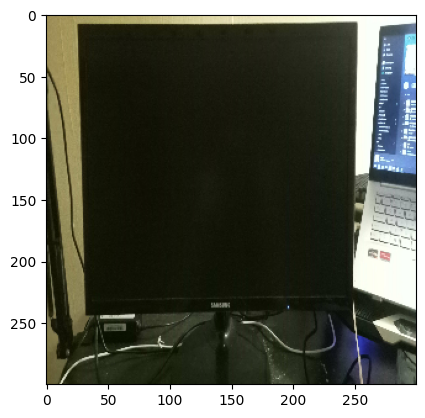

laptop 57.44%
1/1 [==============================] - 0s 272ms/step


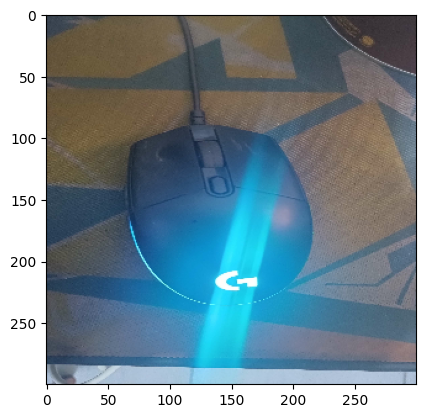

mouse 99.96%
1/1 [==============================] - 0s 283ms/step


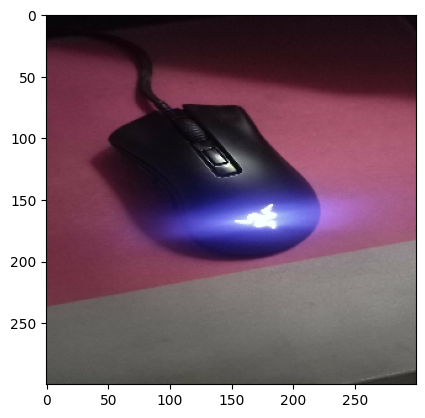

mouse 99.83%
1/1 [==============================] - 0s 322ms/step


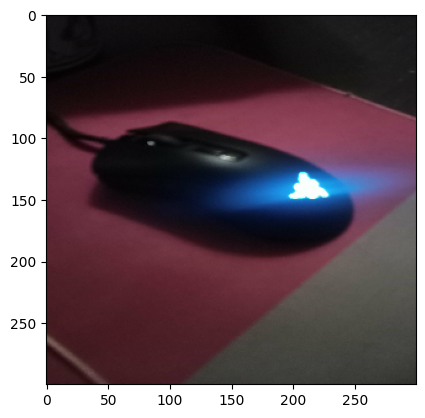

mouse 95.62%
1/1 [==============================] - 0s 335ms/step


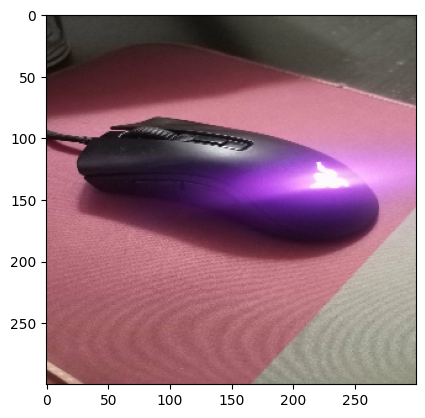

mouse 92.76%
1/1 [==============================] - 0s 306ms/step


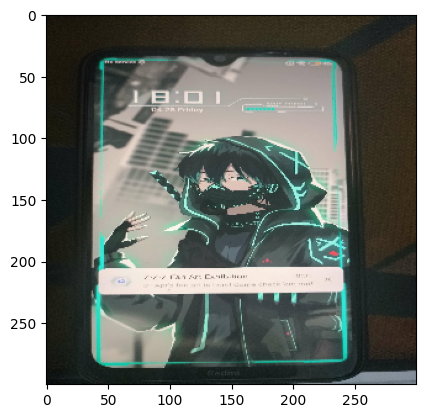

phone 88.82%
1/1 [==============================] - 0s 386ms/step


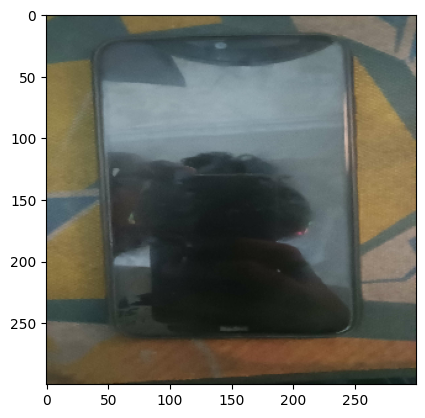

phone 31.41%


In [32]:
root_path = './input/e_waste_classification'

for file in os.listdir(root_path):
    print(file)
    file_path = os.path.join(root_path, file) # path image
    preprocessed = preprocess_img(file_path)
    do_predict(file_path, preprocessed)